# Melobourne city hous pricing. 

This project mainly focuses on understating the house price in Melbourne. There are various factors influencing the price in
city like crime rates, accessibility to school and colleges etc. But we are limiting our focus only on its location and house
constituents like number of bedroom, bathroom, parking spots etc. We are not considering socio-economic factors. 



Data Source - Kaggle

In [1]:
import pandas as pd
import numpy as np
mel_data=pd.read_csv("melb_data.csv")

In [2]:
mel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9548 entries, 0 to 9547
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         9548 non-null   object 
 1   Address        9548 non-null   object 
 2   Rooms          9548 non-null   int64  
 3   Type           9548 non-null   object 
 4   Price          9548 non-null   int64  
 5   Method         9548 non-null   object 
 6   SellerG        9548 non-null   object 
 7   Date           9548 non-null   object 
 8   Distance       9548 non-null   float64
 9   Postcode       9548 non-null   int64  
 10  Bedroom2       9548 non-null   int64  
 11  Bathroom       9548 non-null   int64  
 12  Car            9486 non-null   float64
 13  Landsize       9548 non-null   int64  
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    8181 non-null   object 
 17  Lattitude      9548 non-null   float64
 18  Longtitu

## Variable description
Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method:
S - property sold;
SP - property sold prior;
PI - property passed in;
PN - sold prior not disclosed;
SN - sold not disclosed;
NB - no bid;
VB - vendor bid;
W - withdrawn prior to auction;
SA - sold after auction;
SS - sold after auction price not disclosed.
N/A - price or highest bid not available.

Type:
br - bedroom(s);
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;
dev site - development site;
o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory

## We are going to drop few features from the dataset as it do not add any value to our analysis.

Like suburb, Address, Seller Name, Council area, Property count.

In [3]:
mel_data.drop('Suburb',axis=1,inplace=True)
mel_data.drop('Address',axis=1,inplace=True)
mel_data.drop('SellerG',axis=1,inplace=True)
mel_data.drop('CouncilArea',axis=1,inplace=True)
mel_data.drop('Propertycount',axis=1,inplace=True)

# Data Exploration and pre processing

In [4]:
mel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9548 entries, 0 to 9547
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rooms         9548 non-null   int64  
 1   Type          9548 non-null   object 
 2   Price         9548 non-null   int64  
 3   Method        9548 non-null   object 
 4   Date          9548 non-null   object 
 5   Distance      9548 non-null   float64
 6   Postcode      9548 non-null   int64  
 7   Bedroom2      9548 non-null   int64  
 8   Bathroom      9548 non-null   int64  
 9   Car           9486 non-null   float64
 10  Landsize      9548 non-null   int64  
 11  BuildingArea  7130 non-null   float64
 12  YearBuilt     8205 non-null   float64
 13  Lattitude     9548 non-null   float64
 14  Longtitude    9548 non-null   float64
 15  Regionname    9548 non-null   object 
dtypes: float64(6), int64(6), object(4)
memory usage: 1.2+ MB


In [5]:
mel_data['Date'] = pd.DatetimeIndex(mel_data['Date']).year

Text(0.5, 1.0, 'House price')

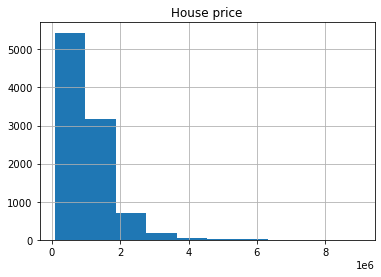

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
mel_data['Price'].hist()
plt.title('House price')

In [8]:
mel_data['Method'].value_counts() 


S     6176
SP    1270
PI    1148
VB     886
SA      68
Name: Method, dtype: int64

<AxesSubplot:title={'center':'Number of bedrooms'}>

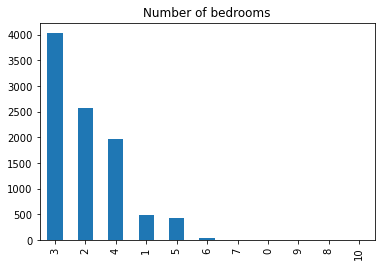

In [9]:
mel_data['Bedroom2'].value_counts().plot(kind='bar', 
                                         title='Number of bedrooms')

<AxesSubplot:title={'center':'Number of Bathrooms'}>

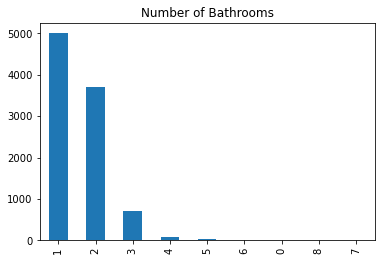

In [10]:
mel_data['Bathroom'].value_counts().plot(kind='bar', 
                                         title='Number of Bathrooms')

In [11]:
pclass_xt = pd.crosstab(mel_data['Bedroom2'], mel_data['Bathroom'])
pclass_xt

Bathroom,0,1,2,3,4,5,6,7,8
Bedroom2,,,,,,,,,
0,1,2,3,0,0,0,0,0,0
1,0,481,7,1,0,0,0,0,0
2,0,2168,393,7,0,0,0,0,0
3,2,2063,1835,131,5,0,0,0,0
4,0,274,1283,363,38,3,0,0,0
5,0,10,176,183,37,20,3,0,0
6,0,2,14,23,6,0,1,0,0
7,0,0,1,4,2,0,0,0,0
8,0,0,0,1,1,0,0,0,0


Text(0, 0.5, 'Bathroom')

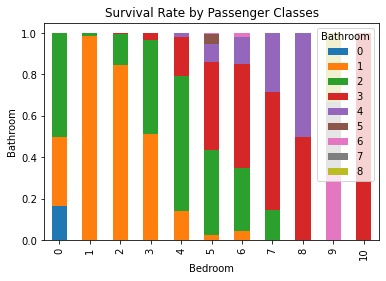

In [12]:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)

pclass_xt_pct.plot(kind='bar', 
                   stacked=True, 
                   title='Survival Rate by Passenger Classes')
plt.xlabel('Bedroom')
plt.ylabel('Bathroom')

<AxesSubplot:title={'center':'Years'}>

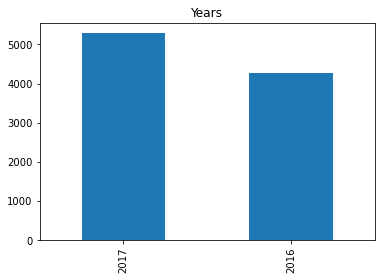

In [13]:
mel_data['Date'].value_counts().plot(kind='bar', 
                                         title='Years')

<AxesSubplot:title={'center':'Distance'}>

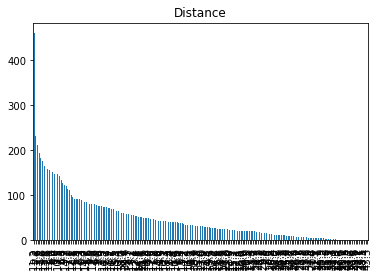

In [14]:
mel_data['Distance'].value_counts().plot(kind='bar', 
                                         title='Distance')

In [15]:
mel_data['ratio']=mel_data['BuildingArea']/mel_data['Landsize']

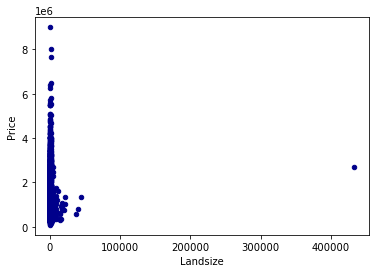

In [16]:
ax1 = mel_data.plot.scatter(x='Landsize',
                      y='Price',
                      c='DarkBlue')

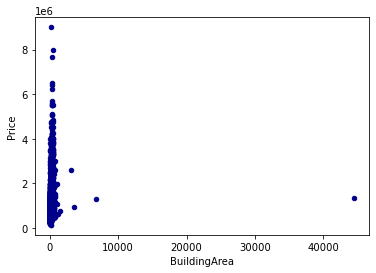

In [17]:
ax1 = mel_data.plot.scatter(x='BuildingArea',
                      y='Price',
                      c='DarkBlue')

Missing values replacement

Text(0.5, 1.0, 'Built Area')

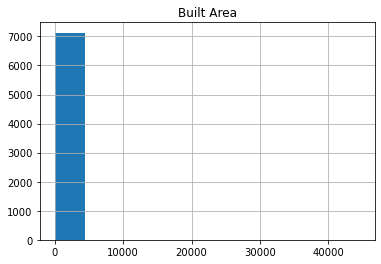

In [18]:
mel_data['BuildingArea'].hist()
plt.title('Built Area')

In [19]:
mel_data['BuildingArea'].mean()

151.96764988779805

In [20]:
mel_data['BuildingArea'].replace(np.NaN,mel_data['BuildingArea'].mean(),inplace=True)

In [21]:
mel_data['Car'].value_counts()

2.0     3986
1.0     3915
0.0      620
3.0      514
4.0      345
5.0       48
6.0       40
8.0        8
7.0        6
10.0       3
9.0        1
Name: Car, dtype: int64

In [22]:
mel_data['Car'].replace(np.NaN,1.0,inplace=True)

In [23]:
mel_data['YearBuilt'].value_counts()

1970.0    866
1960.0    725
1950.0    580
1900.0    341
1980.0    338
         ... 
1897.0      1
1892.0      1
1862.0      1
1942.0      1
1830.0      1
Name: YearBuilt, Length: 144, dtype: int64

In [24]:
mel_data['YearBuilt'].replace(np.NaN,1970,inplace=True)

In [25]:
mel_data['ratio']=mel_data['BuildingArea']/mel_data['Landsize']

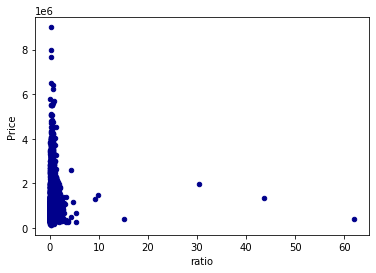

In [26]:
ax1 = mel_data.plot.scatter(x='ratio',
                      y='Price',
                      c='DarkBlue')

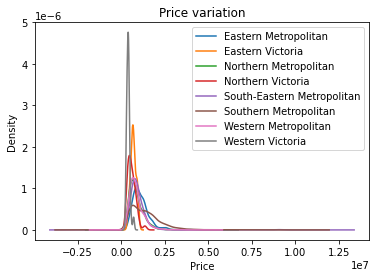

In [27]:

region=sorted(mel_data['Regionname'].unique())
for reg in region:
    mel_data.Price[mel_data.Regionname==reg].plot(kind='kde')

    
plt.title('Price variation')
plt.xlabel('Price')
plt.legend(('Eastern Metropolitan', 'Eastern Victoria', 'Northern Metropolitan','Northern Victoria'
,'South-Eastern Metropolitan','Southern Metropolitan','Western Metropolitan','Western Victoria'), loc='best')

#### Price in Sourthern Metropolitan area is too high indicating posh locality.

In [28]:
sorted(mel_data['Regionname'].unique())

['Eastern Metropolitan',
 'Eastern Victoria',
 'Northern Metropolitan',
 'Northern Victoria',
 'South-Eastern Metropolitan',
 'Southern Metropolitan',
 'Western Metropolitan',
 'Western Victoria']

In [29]:
mel_data.drop('ratio',axis=1,inplace=True)

In [30]:
mel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9548 entries, 0 to 9547
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rooms         9548 non-null   int64  
 1   Type          9548 non-null   object 
 2   Price         9548 non-null   int64  
 3   Method        9548 non-null   object 
 4   Date          9548 non-null   int64  
 5   Distance      9548 non-null   float64
 6   Postcode      9548 non-null   int64  
 7   Bedroom2      9548 non-null   int64  
 8   Bathroom      9548 non-null   int64  
 9   Car           9548 non-null   float64
 10  Landsize      9548 non-null   int64  
 11  BuildingArea  9548 non-null   float64
 12  YearBuilt     9548 non-null   float64
 13  Lattitude     9548 non-null   float64
 14  Longtitude    9548 non-null   float64
 15  Regionname    9548 non-null   object 
dtypes: float64(6), int64(7), object(3)
memory usage: 1.2+ MB


#### We will create dummy variables TYPE, Method and Region name

In [31]:
cols=pd.get_dummies(mel_data['Type'], prefix="Type")
mel_data[cols.columns]=cols
mel_data.drop("Type", axis=1, inplace=True)

In [32]:
cols=pd.get_dummies(mel_data['Method'], prefix="Method")
mel_data[cols.columns]=cols
mel_data.drop("Method", axis=1, inplace=True)

In [33]:
cols=pd.get_dummies(mel_data['Regionname'], prefix="Regionname")
mel_data[cols.columns]=cols
mel_data.drop("Regionname", axis=1, inplace=True)

In [34]:
mel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9548 entries, 0 to 9547
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Rooms                                  9548 non-null   int64  
 1   Price                                  9548 non-null   int64  
 2   Date                                   9548 non-null   int64  
 3   Distance                               9548 non-null   float64
 4   Postcode                               9548 non-null   int64  
 5   Bedroom2                               9548 non-null   int64  
 6   Bathroom                               9548 non-null   int64  
 7   Car                                    9548 non-null   float64
 8   Landsize                               9548 non-null   int64  
 9   BuildingArea                           9548 non-null   float64
 10  YearBuilt                              9548 non-null   float64
 11  Latt

#### Missing value were replaced by suitable metric value. Soon after preprosessing and data exploration we will proceed with the regression algorithm one by one. Price  is the dependent variable with continous value. Keeping that in focus we will start with Scaling data. Before that we need to decide a proper scaling method. Here we will choose min max sclar.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix

y=mel_data['Price']
mel_data.drop('Price',axis=1,inplace=True)
X=mel_data

In [36]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X_train_org, X_out, y_train, y_out = train_test_split(X, y, random_state = 0, test_size = 0.2)

### We are keeping 20% of data as out of sample data and use the rest to buil our model

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_train_org,  y_train, random_state = 0, test_size = 0.2)

In [38]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6110 entries, 1591 to 5476
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Rooms                                  6110 non-null   int64  
 1   Date                                   6110 non-null   int64  
 2   Distance                               6110 non-null   float64
 3   Postcode                               6110 non-null   int64  
 4   Bedroom2                               6110 non-null   int64  
 5   Bathroom                               6110 non-null   int64  
 6   Car                                    6110 non-null   float64
 7   Landsize                               6110 non-null   int64  
 8   BuildingArea                           6110 non-null   float64
 9   YearBuilt                              6110 non-null   float64
 10  Lattitude                              6110 non-null   float64
 11  L

### We are going to scale only numerical values.

In [39]:
scaler = MinMaxScaler()
X_train[['Rooms', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 
   'BuildingArea','YearBuilt', 'Lattitude', 'Longtitude']] = scaler.fit_transform(X_train[['Rooms', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 
   'BuildingArea','YearBuilt', 'Lattitude', 'Longtitude']])
X_test[['Rooms', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 
   'BuildingArea','YearBuilt', 'Lattitude', 'Longtitude']] = scaler.transform(X_test[['Rooms', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 
   'BuildingArea','YearBuilt', 'Lattitude', 'Longtitude']])


<ipython-input-39-ee23ed338e92>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['Rooms', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
C:\Users\vxn190018\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-39-ee23ed338e92>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6110 entries, 1591 to 5476
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Rooms                                  6110 non-null   float64
 1   Date                                   6110 non-null   float64
 2   Distance                               6110 non-null   float64
 3   Postcode                               6110 non-null   float64
 4   Bedroom2                               6110 non-null   float64
 5   Bathroom                               6110 non-null   float64
 6   Car                                    6110 non-null   float64
 7   Landsize                               6110 non-null   float64
 8   BuildingArea                           6110 non-null   float64
 9   YearBuilt                              6110 non-null   float64
 10  Lattitude                              6110 non-null   float64
 11  L

# KNN Regressor

In [41]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
y_pred_KNN_default =knn_reg.predict(X_test)

In [42]:
print(y_pred_KNN_default)

[1080600.  1304399.8 2602000.  ...  669000.   554700.  1211400. ]


In [44]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,14,15,16]}

knn = KNeighborsRegressor()


model_knnreg = GridSearchCV(knn, params, cv=5,scoring = 'neg_mean_absolute_error',return_train_score= True)
model_knnreg.fit(X_train, y_train)
print(model_knnreg.best_params_) 
print('Best Score - KNN:', model_knnreg.best_score_)


{'n_neighbors': 8}
Best Score - KNN: -230326.15869476268


## After iterating through 2 to 16. 8 is decided to be the best parameter.

In [45]:
result = pd.DataFrame(model_knnreg.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003192,0.000977,0.099932,0.004435,2,{'n_neighbors': 2},-258049.960311,-258528.394845,-250307.334288,-252585.751227,...,-253042.898200,4819.572941,14,-141713.573752,-141806.147504,-140697.737520,-142418.909063,-142308.953662,-141789.064300,610.569271
1,0.003391,0.000489,0.111603,0.002104,3,{'n_neighbors': 3},-241309.888707,-246924.739771,-240823.605565,-242093.104746,...,-241800.669831,2936.972700,13,-167654.154528,-167373.877660,-167961.988543,-168950.235338,-167789.971904,-167946.045595,537.696337
2,0.003391,0.000489,0.143815,0.001324,4,{'n_neighbors': 4},-234971.089812,-243865.644640,-231580.781915,-235576.750409,...,-235889.172831,4220.630121,11,-181798.998363,-179715.379041,-182291.060198,-182054.898220,-179664.932334,-181105.053631,1165.806196
3,0.003389,0.000491,0.150397,0.007710,5,{'n_neighbors': 5},-230626.272340,-241601.657610,-229380.465139,-236155.154010,...,-233779.410016,4541.487527,8,-190000.680155,-188473.223568,-189960.236293,-189116.606342,-188461.487971,-189202.446866,678.170554
4,0.004585,0.002235,0.168948,0.031237,6,{'n_neighbors': 6},-227675.701582,-237734.687807,-225988.200900,-234781.478178,...,-231241.052782,4392.821393,5,-196336.110986,-194158.258217,-195074.956663,-194184.406097,-194778.747068,-194906.495806,796.212459


In [46]:
result['param_n_neighbors'].shape[0]

14

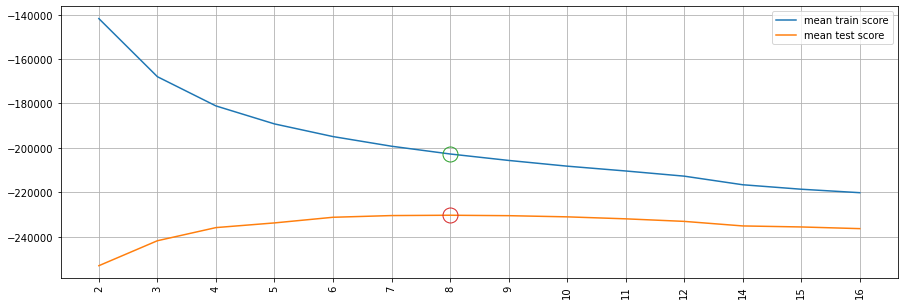

In [47]:
%matplotlib inline

plt.subplots(figsize = (15,5))
plt.plot(range(result['param_n_neighbors'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['param_n_neighbors'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['param_n_neighbors'].shape[0]), result['param_n_neighbors'], rotation = 90)
plt.plot([model_knnreg.best_index_], result['mean_train_score'][model_knnreg.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([model_knnreg.best_index_], result['mean_test_score'][model_knnreg.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

Graph clearly depicts 8 as the apt hyper paramenter for the model

In [48]:
knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(X_train,  y_train)
print("Test Score:",knn.score(X_test, y_test))

Test Score: 0.6107720418709971


# Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print(lreg.score(X_train, y_train))
print(lreg.score(X_test, y_test))

0.6331536897722295
0.5668205759666943


## A simple linear regression has 56 % accuracy. We can fit a line to visualize

Text(0.5, 0, 'RM')

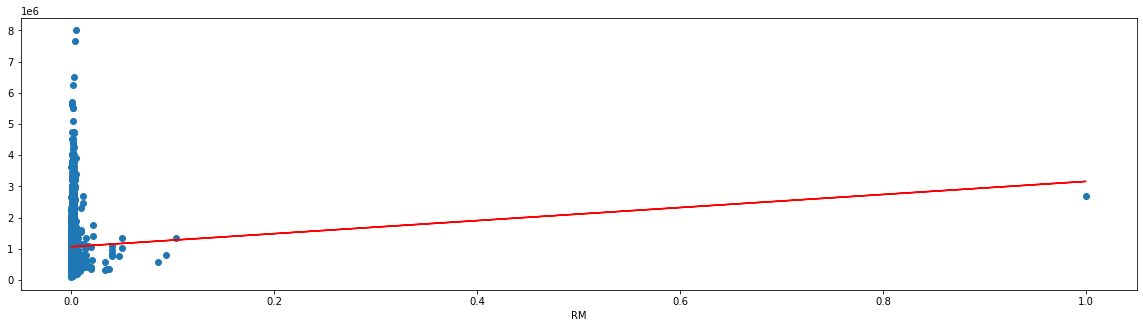

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
X_dummy=np.array(X_train)
X_train_rm = X_dummy[:,7].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.subplots(figsize = (20,5))
plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')

# Ridge Regression

In [53]:
from sklearn.linear_model import Ridge

ridge = Ridge(0.1)
ridge.fit(X_train,  y_train)
ridge.score(X_train, y_train)
ridge.score(X_test, y_test)

0.5666581180413022

In [54]:
from sklearn.model_selection import GridSearchCV
params = {'alpha':[0.01, 0.1, 1, 10, 100]}

ridge = Ridge()


model_ridgereg = GridSearchCV(ridge, params, cv=5,scoring = 'neg_mean_absolute_error',return_train_score= True)
model_ridgereg.fit(X_train, y_train)
print(model_ridgereg.best_params_) 
print('Best Score - ridge:', model_ridgereg.best_score_)

{'alpha': 1}
Best Score - ridge: -266560.4065657641


## We will be using mean absolute error as the scoring factor in cross validation.

In [224]:
result = pd.DataFrame(model_ridgereg.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005983,1.784249e-03,0.003591,2.720561e-03,0.01,{'alpha': 0.01},-259367.493602,-275953.723534,-262888.308594,-270188.451399,...,-269397.988408,7363.673758,3,-268763.659366,-262651.092826,-266116.472091,-264327.181915,-262104.297835,-264792.540807,2431.114365
1,0.004588,4.885194e-04,0.001396,4.888697e-04,0.1,{'alpha': 0.1},-259412.755834,-275902.447427,-262928.558009,-270256.813972,...,-267158.650777,5726.484642,2,-268746.895467,-262637.442857,-266087.685524,-264311.914119,-264100.519236,-265176.891440,2094.279667
2,0.003990,4.422006e-07,0.001396,4.885583e-04,1,{'alpha': 1},-259856.257297,-275527.797496,-263171.914905,-270843.315859,...,-266560.406566,5747.272701,1,-268865.107278,-262835.980956,-266123.512882,-264412.501129,-265105.939280,-265468.608305,2007.123475
3,0.004390,4.878311e-04,0.000988,2.062507e-05,10,{'alpha': 10},-265897.199126,-277122.618973,-266870.158323,-278030.590817,...,-270780.516545,5566.850869,4,-272722.026457,-267774.490571,-270385.338357,-268831.461708,-269894.566500,-269921.576718,1664.731378
4,0.003989,1.386932e-06,0.000998,5.722046e-07,100,{'alpha': 100},-300353.601423,-308636.187294,-303379.650777,-317032.083640,...,-306511.319259,5902.385477,5,-308180.848922,-304557.420737,-305635.814522,-304342.792940,-305926.361473,-305728.647719,1367.725527


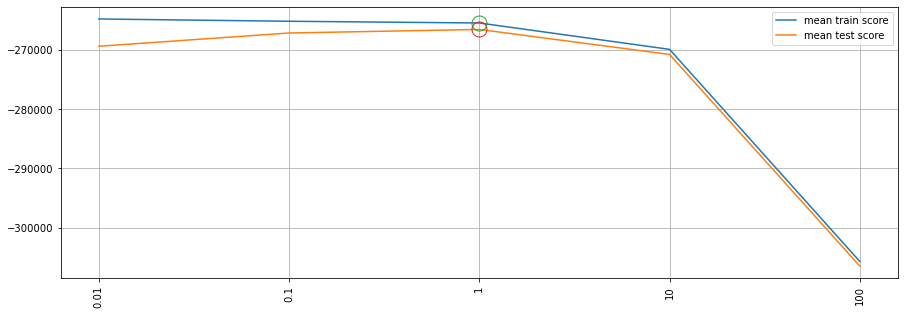

In [228]:
%matplotlib inline

plt.subplots(figsize = (15,5))
plt.plot(range(result['param_alpha'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['param_alpha'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['param_alpha'].shape[0]), result['param_alpha'], rotation = 90)
plt.plot([model_ridgereg.best_index_], result['mean_train_score'][model_ridgereg.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([model_ridgereg.best_index_], result['mean_test_score'][model_ridgereg.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [232]:
ridge = Ridge(alpha=1)
ridge.fit(X_train,  y_train)
print("Ridge Score",ridge.score(X_test, y_test))

Ridge Score 0.5657339723693331


### Ridge could only describe 56% of the variance in the data

In [233]:
ridge.coef_ #co-efficients of ridge regression

array([  882918.36216408,    54626.03626894, -1992209.31620755,
          62912.71924777,   693698.68393379,  1791791.46277814,
         581941.68047652,   617209.61269417,   722037.99014316,
       -1801155.08520547,  -580418.12338952,   512840.65598862,
         228255.56723592,   -26678.6493531 ,  -201576.91788331,
         -24959.57453795,    59155.50277112,   -57292.93417773,
           7194.49759194,    15902.5083522 ,  -123496.4596166 ,
         -24342.35083915,  -230341.74883974,   421321.41317744,
        -114922.51718776,   130448.07206483,  -246910.34218255,
         188243.93342336])

In [234]:
ridge.intercept_

2240090.7272706907

# Lasso

In [235]:
from sklearn.linear_model import Lasso

lasso = Lasso(0.1)
lasso.fit(X_train,  y_train)
lasso.score(X_train, y_train)
lasso.score(X_test, y_test)

C:\Users\vxn190018\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 189290224836116.5, tolerance: 262409952022.61667
  model = cd_fast.enet_coordinate_descent(


0.5668169400673132

In [237]:
from sklearn.model_selection import GridSearchCV
params = {'alpha':[0.01, 0.1, 1, 10, 100,1000]}

lasso = Lasso()


model_lassoreg = GridSearchCV(lasso, params, cv=5,scoring = 'neg_mean_absolute_error',return_train_score= True)
model_lassoreg.fit(X_train, y_train)
print(model_lassoreg.best_params_) 
print('Best Score - ridge:', model_lassoreg.best_score_)

C:\Users\vxn190018\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 157589575757003.38, tolerance: 213621757422.72736
  model = cd_fast.enet_coordinate_descent(
C:\Users\vxn190018\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 148492632382578.9, tolerance: 207557844158.6169
  model = cd_fast.enet_coordinate_descent(
C:\Users\vxn190018\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156251047891010.2, tolerance: 212081202669.03775
  model = cd_fast.enet_coordinate_descent(
C:\Users\vxn190018\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530

{'alpha': 100}
Best Score - ridge: -267520.1062626065


In [238]:
result = pd.DataFrame(model_lassoreg.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.124068,0.008239,0.001996,0.000002,0.01,{'alpha': 0.01},-259362.267701,-275960.055905,-262883.431683,-270180.491976,...,-270444.723053,8830.012424,6,-268765.579618,-262652.791431,-266119.972053,-264328.964499,-261306.005765,-264634.662673,2621.901621
1,0.128058,0.013857,0.002394,0.000489,0.1,{'alpha': 0.1},-259362.574094,-275959.810515,-262883.493911,-270180.747228,...,-270440.548722,8823.448266,5,-268765.506307,-262652.724628,-266119.870258,-264328.907456,-261307.856765,-264634.973083,2621.408493
2,0.139631,0.013004,0.002592,0.000488,1,{'alpha': 1},-259365.885961,-275957.388776,-262884.116191,-270183.297028,...,-270398.920733,8758.025993,4,-268764.799237,-262652.202034,-266118.857285,-264328.331836,-261326.491793,-264638.136437,2616.439745
3,0.053059,0.025495,0.003192,0.000746,10,{'alpha': 10},-259398.289732,-275937.446184,-262890.669011,-270209.994985,...,-269989.226674,8132.768247,3,-268758.117487,-262648.964063,-266110.396542,-264322.947914,-261536.942379,-264675.473677,2561.576798
4,0.032314,0.010972,0.001596,0.000489,100,{'alpha': 100},-259740.338942,-275850.817662,-262962.624098,-270486.009393,...,-267520.106263,5667.021760,1,-268825.664111,-262743.787745,-266179.025713,-264411.163267,-263926.144907,-265217.157149,2115.675239


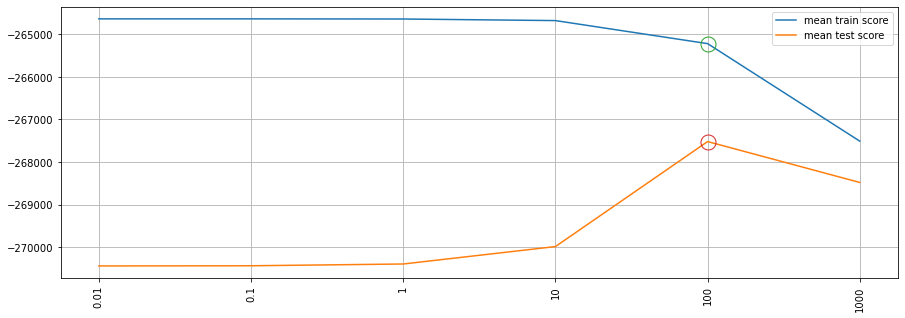

In [239]:
%matplotlib inline

plt.subplots(figsize = (15,5))
plt.plot(range(result['param_alpha'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['param_alpha'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['param_alpha'].shape[0]), result['param_alpha'], rotation = 90)
plt.plot([model_lassoreg.best_index_], result['mean_train_score'][model_lassoreg.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([model_lassoreg.best_index_], result['mean_test_score'][model_lassoreg.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

## The penalty factor 100 is yeiding better result with both training and test data.

In [240]:
lasso = Lasso(alpha=100)
lasso.fit(X_train,  y_train)
print("Lasso Score",lasso.score(X_test, y_test))

Lasso Score 0.5667624236119491


# Polynomial regression

In [246]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg_score_train=[]
poly_reg_score_test=[]


for i in [1,2,3]:
    poly = PolynomialFeatures(degree = i)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)
    poly_reg_score_train.append(poly_reg.score(X_train_poly, y_train))
    poly_reg_score_test.append(poly_reg.score(X_test_poly, y_test))

### For the sake of simplicity we are using only polynomial degree of 1,2,3.

In [248]:
poly_reg_score_train

[0.6331538344124559, 0.7885666702035642, 0.9021594243847674]

In [250]:
poly_reg_score_test

[0.5668169271416315, -3.0247438554046765e+17, -2.0847936282264977e+20]

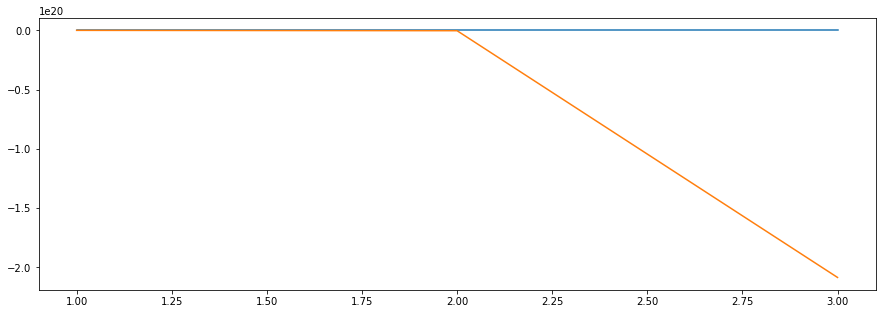

In [249]:
plt.subplots(figsize = (15,5))
plt.plot( [1,2,3], poly_reg_score_train, label = 'mean train score')
plt.plot([1,2,3], poly_reg_score_test, label = 'mean test score')

### Second degree polynomial is giving us better results.

# Support Vector Machine 

In [75]:
from sklearn.svm import SVR

model_svr=SVR()
model_svr.fit(X_train, y_train)
y_pred_model_svr =model_svr.predict(X_test) #Base model without parameter tuning

In [76]:
model_svr.score(X_test,y_test) #,1,100,.01,1,10,100],

-0.07090980561158933

In [81]:
from sklearn.model_selection import GridSearchCV

model_svr=SVR()
parameters_svr = {'kernel':['linear','rbf','poly']],
                  'gamma' : [0.1,1,10,100],
                  'degree':[1,2,3,4],
                  'C':[0.1,1,10,100]}
                   
# with GridSearch
grid_search_svr = GridSearchCV(estimator=model_svr, param_grid=parameters_svr,scoring = 'neg_mean_absolute_error',
                               cv = 5,return_train_score= True,n_jobs=5)
grid_search_svr.fit(X_train, y_train)
print(grid_search_svr.best_params_) 
print('Best Score - ridge:', grid_search_svr.best_score_)

{'C': 10, 'degree': 1, 'gamma': 0.1, 'kernel': 'linear'}
Best Score - ridge: -443665.56672434334


In [84]:
result = pd.DataFrame(grid_search_svr.cv_results_)

### Hyper parameters C=10 Degree=1 gamma=0.1 and a linear kernel gives us a better score for training sample.

In [86]:
grid_search_svr=SVR(C= 10, degree= 1, gamma= 0.1, kernel='linear')
grid_search_svr.fit(X_train, y_train)
print("SVR Score",grid_search_svr.score(X_test, y_test))

Decission Tree -0.05753358177788459


### Models predition is subpar for the test sample. It is better to consider other models.

# Decission Tree Regressor

In [55]:
from sklearn.tree import DecisionTreeRegressor

model_dtr=DecisionTreeRegressor()
model_dtr.fit(X_train, y_train)
y_pred_model_dtc =model_dtr.predict(X_test) #Base model without parameter tuning

In [68]:
param_dt = {'max_depth':[1, 2, 3, 5, 7, 10,11,12,13,14]}

grid_dt = GridSearchCV(estimator=model_dtr, param_grid=param_dt, cv = 5, return_train_score= True)
grid_dt.fit(X_train, y_train)
print(grid_dt.best_params_)
print(grid_dt.best_score_)

{'max_depth': 10}
0.6541154923266448


In [71]:
result = pd.DataFrame(grid_dt.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006382,0.001353,0.001796,0.000747,1,{'max_depth': 1},0.148279,0.250600,0.173528,0.214089,...,0.190694,0.036858,10,0.208055,0.187155,0.206476,0.197105,0.209390,0.201636,0.008426
1,0.009174,0.001932,0.001596,0.000799,2,{'max_depth': 2},0.334179,0.409777,0.385312,0.371040,...,0.369203,0.027158,9,0.386039,0.375236,0.382193,0.385663,0.391458,0.384118,0.005339
2,0.009175,0.000399,0.001796,0.000399,3,{'max_depth': 3},0.489701,0.525490,0.508535,0.486439,...,0.497005,0.017887,8,0.540205,0.533612,0.534700,0.539589,0.554729,0.540567,0.007543
3,0.013554,0.000788,0.001796,0.000399,5,{'max_depth': 5},0.626086,0.609758,0.632954,0.630460,...,0.608838,0.032958,7,0.689878,0.680031,0.683313,0.675194,0.711747,0.688033,0.012782
4,0.019551,0.003709,0.001792,0.000397,7,{'max_depth': 7},0.604667,0.624143,0.669954,0.653267,...,0.634931,0.023438,5,0.802516,0.788417,0.791409,0.791685,0.815188,0.797843,0.009908


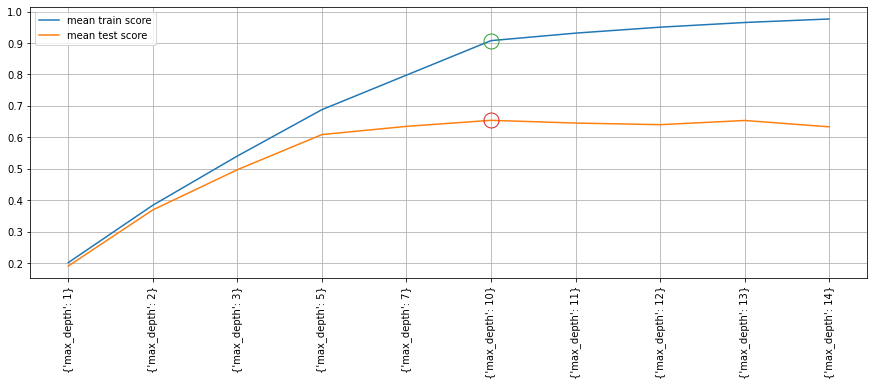

In [72]:
%matplotlib inline

plt.subplots(figsize = (15,5))
plt.plot(range(result['params'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['params'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['params'].shape[0]), result['params'], rotation = 90)
plt.plot([grid_dt.best_index_], result['mean_train_score'][grid_dt.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([grid_dt.best_index_], result['mean_test_score'][grid_dt.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

## Decission Tree with maximum depth of 10 is yeilding us a better result we will check this on our test sample.

In [73]:
model_dtr=DecisionTreeRegressor(max_depth=10)
model_dtr.fit(X_train, y_train)
print("Decission Tree",model_dtr.score(X_test, y_test))

Decission Tree 0.5937184171901747


##  We are getting better result on KNN regressor but a score of 59.37% is better than any other regressor.

## Finally to conclude KNN regresor was the best model built so far.